In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
n = 1000
f = 3
k = 20
X = np.random.randn(n, f)
expanded_idx = np.random.choice(np.arange(f), size=k)
X = X[:, expanded_idx] + np.random.randn(n, k)

In [61]:
df = pd.DataFrame(X)

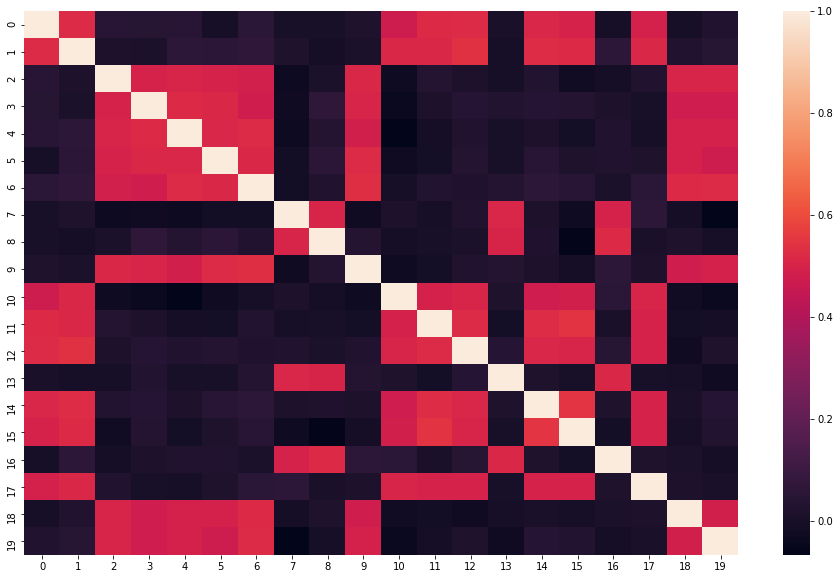

In [62]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), ax=ax)

In [63]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups are highly correlated variables 
    are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

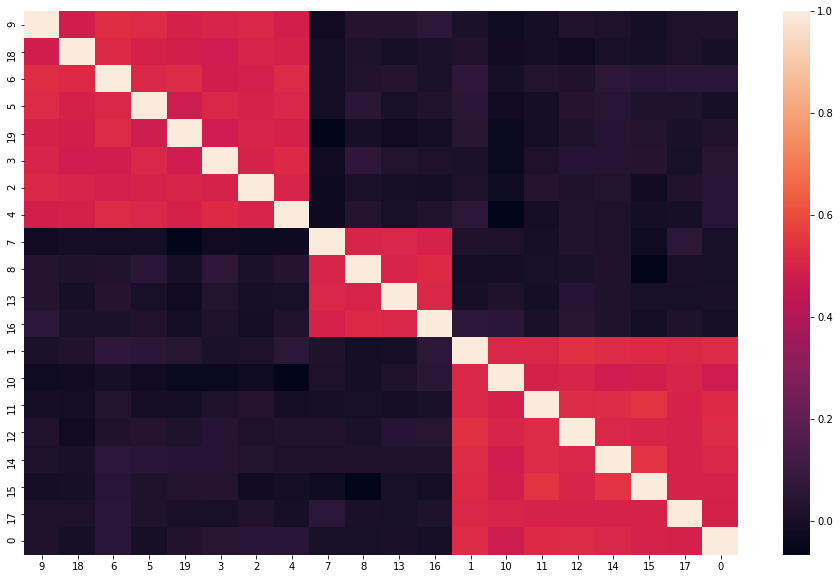

In [64]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(cluster_corr(df.corr()), ax=ax)